<a href="https://colab.research.google.com/github/matheuslfer/TCC/blob/main/TCC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TCC

In [1]:
## PASSOS INICIAIS:
# Como usar o Google COLAB para ANALISAR DADOS? | Handshake #08: https://www.youtube.com/watch?v=_mIwsA2ddSc;
# MELHOR FORMA DE APRENDER PYTHON (Google Colab Notebook): https://www.youtube.com/watch?v=Gojqw9BQ5qY

##IMPORTANDO DADOS DO DRIVE.
# import pandas as ps
# pd.read_csv('local do arquivo')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pesquisar**: como instalar os pacotes do Matplotlib.pyplot, Glob e Os.

In [3]:
# Importando pacotes Necessarios 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import glob
import github2pypi as git

In [4]:
# Importando dados.

arquivos= r'/content/drive/MyDrive/UFPA/TCC Matheus /Dados Clorofila 1997-2020/CHLOR2007_9.nc'
dados=(arquivos)

In [5]:
#Lendo o arquivo NETCDF e olhando o que ele tem
ds = nc.Dataset(dados)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: A20072442007273.L3m_MO_CHL_chl_ocx_9km.nc
    instrument: MODIS
    title: HMODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    temporal_range: month
    processing_version: 2018.0
    date_created: 2018-01-03T23:05:05.000Z
    history: l3mapgen par=A20072442007273.L3m_MO_CHL_chl_ocx_9km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2007-09-01T00:35:01.000Z
    time_coverage_end: 2007-10-01T02:49:59.000Z
    start_orbit_number: 28336
    end_orbit_number: 28774
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude: 90.0
    southernmost_latitude: -90.0
    westernmost_longitude: -180.0
    ea

In [6]:
#Lendo as variaveis latitude,longitude e time do arquivo NetCDF
latitude = ds['lat'][:]
longitude = ds['lon'][:]


In [7]:
#Recortando um pedaço dos dados de clorofila
#Exemplo para a Foz do Amazonas

#Intervalos de Lat e Lon dos dados
latbounds = [-10,15]
lonbounds = [-40,-30] 


In [8]:
# Achando os indices de lat e  lon
latli = np.argmin( np.abs( latitude - latbounds[0] ) ) 
latui = np.argmin( np.abs( latitude - latbounds[1] ) ) 

lonli = np.argmin( np.abs( longitude - lonbounds[0] ) )
lonui = np.argmin( np.abs( longitude - lonbounds[1] ) )  

lonui

1799

In [9]:
#Pegando a Clorofila recortada
chloro_subset = ds.variables['chl_ocx'][latui:latli,lonli:lonui]
 #Dado recortado pra regiao [possui mascara e valores]

In [10]:
mascara = chloro_subset.mask #Mascara com true e false
chloro = chloro_subset.data #Dados "reais"
fill = chloro_subset.fill_value #Dados que nao sao validos

#Retomando indices onde os dados nao sao validos
ind = np.where(chloro==fill)
chloro[ind] = np.nan #Convertendo os dados para NaN


In [11]:
#Pegando a lat e lon apenas para a area recortada
latr = latitude[latui:latli]
lonr = longitude[lonli:lonui]

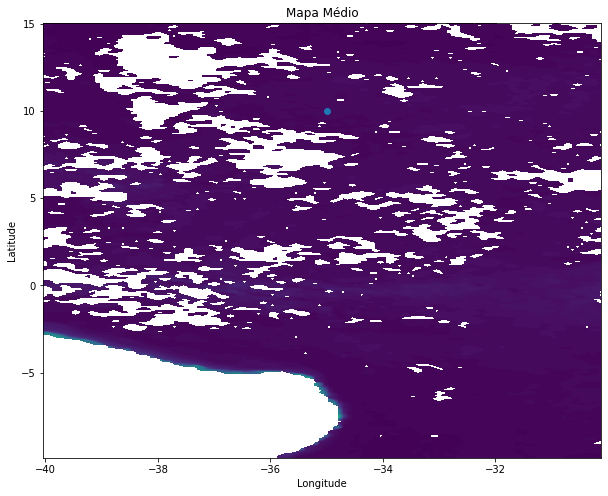

In [12]:
#Criando uma figura para plotar os dados
fig,(ax1) = plt.subplots(1, 1,figsize=(10, 8))

lat2,lon2=np.meshgrid(lonr,latr)
c = ax1.contourf(lonr,latr,chloro_subset,levels=np.linspace(0,5,100))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Mapa Médio')
ax1.scatter(-35,10,marker='o')

# TESTE MAPA

In [19]:
#!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy;

!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
#!pip install shapely --no-binary shapely;
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:336: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7a58811d40> (for post_execute):


TypeError: ignored

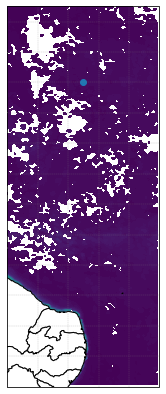

In [37]:
#fig,(ax) = plt.subplots(1, 1,figsize=(10, 8))

f = plt.figure(figsize=(15,7))
ax = f.add_subplot(1,1, 1, projection=ccrs.PlateCarree())

ax = plt.axes(projection=ccrs.PlateCarree(),extent=[-40, -30, -10, 15])
c = ax.contourf(lonr,latr,chloro_subset,levels=np.linspace(0,5,100),transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor='lightgray', edgecolor='k')
ax.add_feature(cfeature.STATES, facecolor='w', edgecolor='k')



xyticklabel=[True,False,True,False]



### CONFIGURING MERIDIANS AND PARALLELS
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=.4,
                        color='gray', alpha=0.5, linestyle='--',
                        xlocs=np.arange(-360, 360, 2),
                        ylocs=np.arange(-90, 90, 2))

gl.ylabels_left = xyticklabel[0]
gl.ylabels_right = xyticklabel[1]
gl.xlabels_bottom = xyticklabel[2]
gl.xlabels_top = xyticklabel[3]
gl.xformatter = LongitudeFormatter
gl.yformatter = LatitudeFormatter
ax.scatter(-35,10,marker='o')

